In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Creat data
data = {
    'beta': np.random.beta(5, 1, 1000) * 60,
    'exponential': np.random.exponential(10, 1000),
    'normal_p': np.random.normal(10, 2, 1000),
    'normal_l': np.random.normal(10, 10, 1000)
}
df = pd.DataFrame(data)

In [9]:
# df.head()

In [6]:
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])
# bimodal

In [7]:
df['bimocal'] = bimodal

In [8]:
df.head()

,beta,exponential,normal_p,normal_l,bimocal
0,55.302196,3.938013,9.354748,8.134236,22.047043
1,52.679955,3.926368,11.812159,6.253726,23.668013
2,56.582905,19.355592,10.550226,38.745666,23.143025
3,58.654720,19.194501,6.421975,2.056148,16.420250
4,44.473500,4.240570,11.801870,10.715850,20.242457


<AxesSubplot:ylabel='Density'>

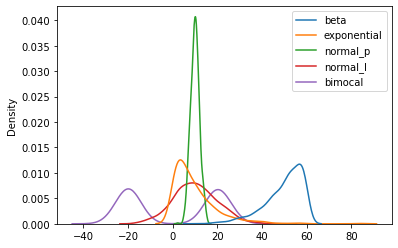

In [10]:
#Visualization data
sns.kdeplot(data=df)

In [11]:
df.describe()

,beta,exponential,normal_p,normal_l,bimocal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.889356,9.860584,9.969426,10.180796,0.171673
std,8.576907,9.980756,1.979935,9.790760,20.341537
min,11.252705,0.003552,2.237684,-16.314854,-29.710496
25%,45.307055,2.889892,8.604275,3.410315,-19.830420
50%,52.146954,6.937085,10.016234,9.784000,0.272255
75%,56.527332,13.425967,11.281721,16.458147,20.229504
max,59.977529,83.742734,15.554165,47.994081,28.987085


In [12]:
#Add super big data
normal_big = np.random.normal(1000000, 10000, (1000, 1))
df['nomal_big'] = normal_big

In [13]:
df.head()

,beta,exponential,normal_p,normal_l,bimocal,nomal_big
0,55.302196,3.938013,9.354748,8.134236,22.047043,9.958202e+05
1,52.679955,3.926368,11.812159,6.253726,23.668013,1.015137e+06
2,56.582905,19.355592,10.550226,38.745666,23.143025,9.966515e+05
3,58.654720,19.194501,6.421975,2.056148,16.420250,1.008965e+06
4,44.473500,4.240570,11.801870,10.715850,20.242457,1.002843e+06


<AxesSubplot:ylabel='Density'>

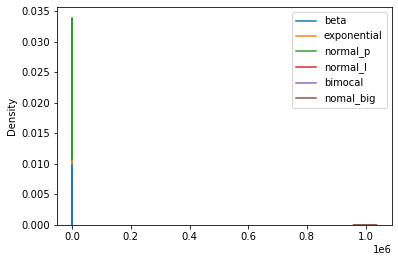

In [14]:
sns.kdeplot(data=df)

<AxesSubplot:>

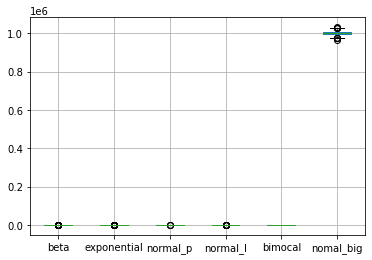

In [15]:
df.boxplot()

In [16]:
scaler = MinMaxScaler()

In [18]:
df_s = scaler.fit_transform(df)

In [21]:
# df_s.shape

(1000, 6)

In [22]:
col_names = df.columns.tolist()
col_names

['beta', 'exponential', 'normal_p', 'normal_l', 'bimocal', 'nomal_big']

In [23]:
df_s = pd.DataFrame(df_s, columns=col_names)

In [24]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimocal,nomal_big
0,0.904046,0.046985,0.534455,0.380182,0.881766,0.460825
1,0.850229,0.046846,0.718994,0.350940,0.909382,0.763827
2,0.930331,0.231099,0.624230,0.856188,0.900438,0.473865
3,0.972851,0.229175,0.314219,0.285668,0.785905,0.667015
4,0.681804,0.050598,0.718222,0.420326,0.851022,0.570992


<AxesSubplot:ylabel='Density'>

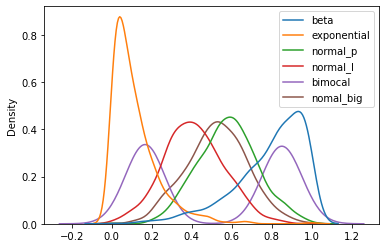

In [25]:
sns.kdeplot(data=df_s)

<AxesSubplot:>

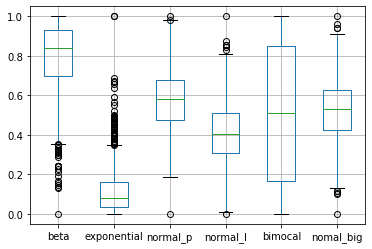

In [26]:
df_s.boxplot()

In [33]:
print(f"Min of df_s.beta is: {df_s['beta'].min()}")
print(f"Max of df_s.beta is {df_s['beta'].max()}")

Min of df_s.beta is: 0.0
Max of df_s.beta is 1.0


In [35]:
mins = [df[col].min() for col in col_names]
mins

[11.252704705359015,
 0.0035520937109093337,
 2.2376836291360602,
 -16.314854075169336,
 -29.710496354983963,
 966442.1195322935]

In [36]:
maxs = [df[col].max() for col in col_names]
maxs

[59.97752924376269,
 83.74273410224413,
 15.554165032168255,
 47.99408094884916,
 28.98708548674695,
 1030193.2096205389]

In [37]:
mins_s = [df_s[col].min() for col in col_names]
mins_s

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [38]:
maxs_s = [df_s[col].max() for col in col_names]
maxs_s

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]